# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Оглавление

1. [Изучение данных из файла](#id)
2. [Предобработка данных](#pd)
3. [Исследовательский анализ данных](#ia)
4. [Составление портрета пользователя каждого региона](#sp)
5. [Проверка гипотез](#pg)
6. [Общий вывод](#ov)

##  1. Изучение данных из файла <a class="anchor" id="id"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
games_data = pd.read_csv('/datasets/games.csv')
display(games_data.head())
games_data.info()
games_data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

В таблице 11 колонок, типы данных - float64, object.

Столбцы нужно привести к нижнему регистру.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Согласно документации к данным:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Возврастные ограничения согласно ESRB:

* `EC` («Early childhood») — «Для детей младшего возраста»
* `E` («Everyone») — «Для всех»
* `E10+` («Everyone 10 and older») — «Для всех от 10 лет и старше»
* `T` («Teen») — «Подросткам»
* `M` («Mature») — «Для взрослых»
* `AO` («Adults Only 18+») — «Только для взрослых»
* `RP` ( «Rating Pending»») — «Рейтинг ожидается»

## 2. Предобработка данных <a class="anchor" id="pd"></a>

In [2]:
# Привожу названия столбцов к нижнему регистру
print(games_data.columns)
games_data.columns = games_data.columns.str.lower()
print(games_data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [3]:
# Подсчет пропусков до предобработки
print(games_data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [4]:
# Подсчёт значений tbd - to be defined до предобработки
count_tbd = 0
for i in games_data['user_score']:
    if i == 'tbd':
        count_tbd += 1
print(count_tbd)

2424


In [5]:
# Удаляю строки где пропущен год, название и жанр
games_data.dropna(subset = ['year_of_release', 'name', 'genre'], inplace = True)
games_data = games_data.reset_index(drop = True)

In [6]:
# Заполняю пропуски в колонке rating на 'Не определен', так как это категориальная переменная
games_data['rating'] = games_data['rating'].fillna('AO')

In [7]:
# Заменяю тип данных на float
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
# Заменяю тип данных на int
games_data['year_of_release'] = games_data['year_of_release'].astype('int')

In [8]:
# Подсчет пропусков и дубликатов после предобработки
print(games_data.isna().sum())
print('Количество дубликатов:', games_data.duplicated().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64
Количество дубликатов: 0


In [9]:
# Подсчёт значений tbd - to be defined после предобработки
count_tbd_2 = 0
for i in games_data['user_score']:
    if i == 'tbd':
        count_tbd_2 += 1
print(count_tbd_2)

0


In [10]:
# Оценка критиков и пользователей отсутствует в основном там, где рейтинг «AO» («Adults Only 18+»)  
rate_data = games_data.query('rating == "AO"')
display(rate_data.head())
rate_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,AO
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,AO
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,AO
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,AO
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,AO


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6677 entries, 1 to 16443
Data columns (total 11 columns):
name               6677 non-null object
platform           6677 non-null object
year_of_release    6677 non-null int64
genre              6677 non-null object
na_sales           6677 non-null float64
eu_sales           6677 non-null float64
jp_sales           6677 non-null float64
other_sales        6677 non-null float64
critic_score       82 non-null float64
user_score         84 non-null float64
rating             6677 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 626.0+ KB


In [11]:
# Добавляю столбец с суммарными продажами
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + \
    games_data['jp_sales'] + games_data['other_sales']
display(games_data.head())
games_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,AO,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,AO,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод**

1. Заменил названия столбцов.
2. Изменил формат в колонках year_of_release и user_score. В колонке year_of_release значения целочисленные, поэтому для удобства перевел их в int64. NaN относится к вещественным числам, из-за этого NaN можно использовать в математических операциях, не вызывая ошибку, поэтому поменял формат в user_score на float. В столбце было значение tbd (to be defined - предстоит определить), при преобразовании в формат float при помощи аргумента errors='coerce', tbd заменилось на NaN. Использовал методы astype() и to_numeric().  
3. В таблице были обнаруженны пропущенные значения в столбцах name, year_of_release, genre, critic_score, user_score и rating. Строки, где пропущен год, название и жанр удалил, они не подходят для дальнейшего исследования. В колонке rating пропуски поменял на «AO» («Adults Only 18+»), потому что это единственное ограничение из ESRB не указанное в данной базе. Столбцы critic_score и user_score оставил как есть, чтобы не исказить результаты корреляционного анализа. По большей части пропуски в этих колонках там, где рейтинг AO. По типу пропуска, думаю это тип MAR (Missing At Random). 
4. Дубликатов не обнаружил.
5. Посчитал суммарные продажи во всех регионах, результат в столбце total_sales. 

## 3. Исследовательский анализ данных <a class="anchor" id="ia"></a>

AxesSubplot(0.125,0.125;0.775x0.755)


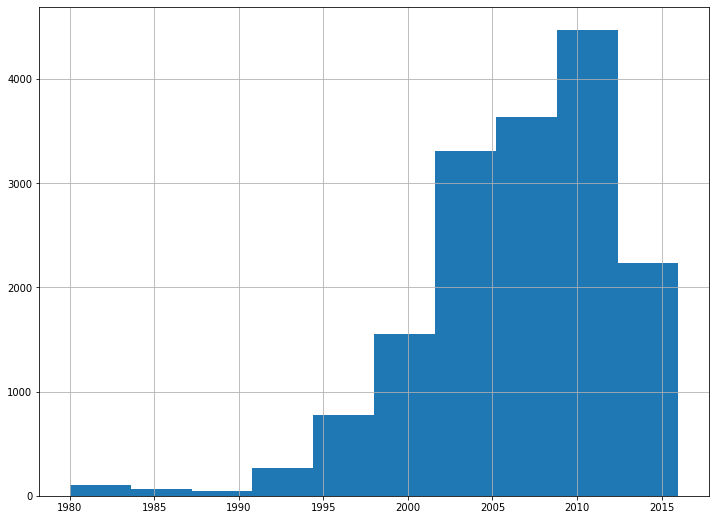

In [12]:
# Гистограмма выпускаемых игр по годам
print(games_data['year_of_release'].hist(bins=10, figsize=(12,9)))

В 1981 и 1982 гг. можно увидеть резкий скачок в игровой индустрии, если сравнить с 80 годом, потом показатели упали. До 1993 года игр выпускалось мало, в 94 количество увеличилось в два раза по сравнению с предыдущим годом. С 1994 по 2009 кол-во неизменно растет, исключение 2003 и 2004 годы. С 2010 по 2011 наблюдается небольшой спад, но выпускается все еще больше 1000 игр. В 2012 уже сильный спад, почти в два раза по сравнению с предыдущим годом. В последующие годы количество игр не поднималось выше 606. Больше всего игр вышло в 2008 году - 1427.     

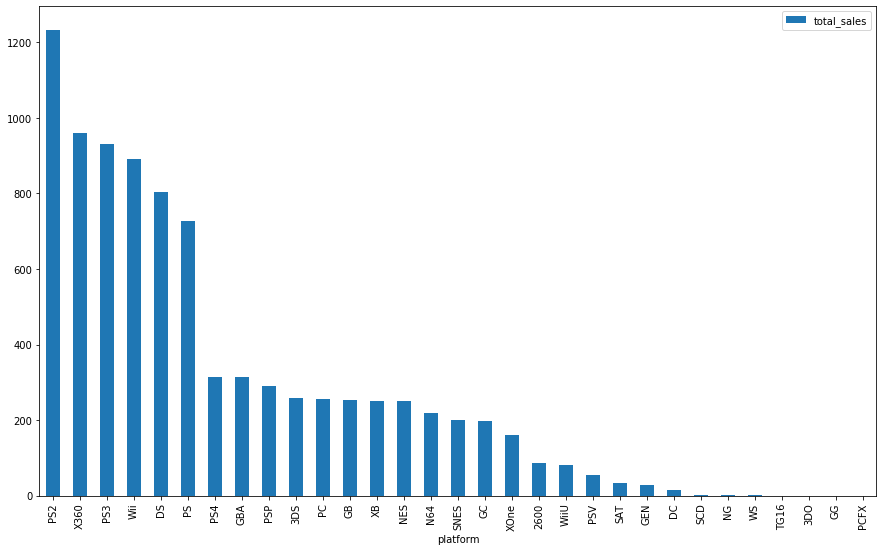

In [13]:
# График платформ и их суммарных продаж
games_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales', ascending = False 
                                                                      ).plot(kind="bar", figsize = (15, 9))

Text(0, 0.5, 'Кол-во копий')

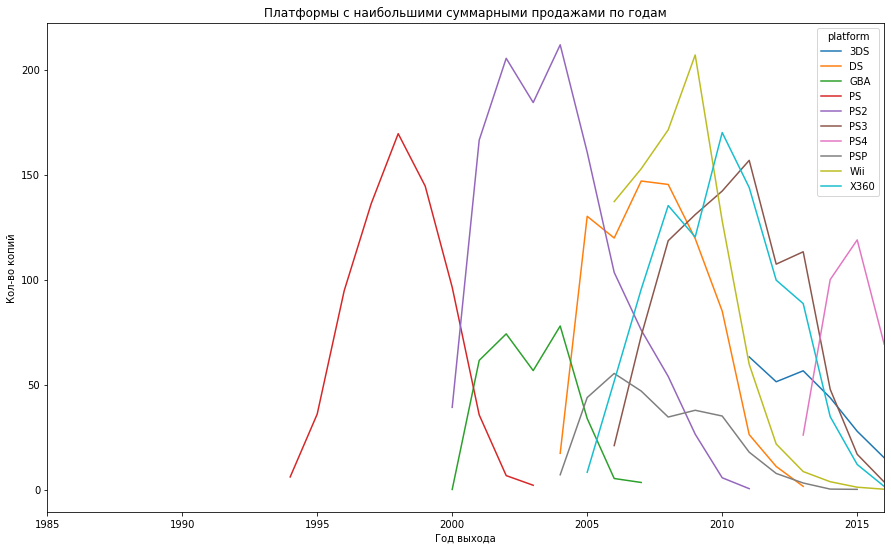

In [14]:
# График топ-10 платформ
top_10_platform = games_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales',
                                                        ascending = False).head(10).index
games_data.query('platform in @top_10_platform').pivot_table(index='year_of_release', 
                                    columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 9))
plt.title('Платформы с наибольшими суммарными продажами по годам')
plt.xlabel('Год выхода')
plt.ylabel('Кол-во копий')

Новые платформы появляются ориентировочно через каждые 5, а старые исчезают приблизительно через 10 лет.

In [15]:
# Определяю актуальный период
actual_period = games_data.groupby(['platform','year_of_release']) \
                .agg({'total_sales': 'sum'}).query('platform in @top_10_platform and total_sales > 1')
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release':'count'})
actual_period.columns = ['years']
display(actual_period)
print('Среднее кол-во лет:', actual_period.mean())

,years
platform,
3DS,6
DS,10
GBA,7
PS,10
PS2,11
PS3,11
PS4,4
PSP,10
Wii,10


Среднее кол-во лет: years    9.1
dtype: float64


In [16]:
# Сделал срез, чтобы убрать лишнее и оставить только актуальный период.
good_data = games_data.query('year_of_release >= 2013') 
display(good_data.head())
good_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,AO,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,AO,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             2233 non-null object
total_sales        2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Text(0, 0.5, 'Кол-во копий')

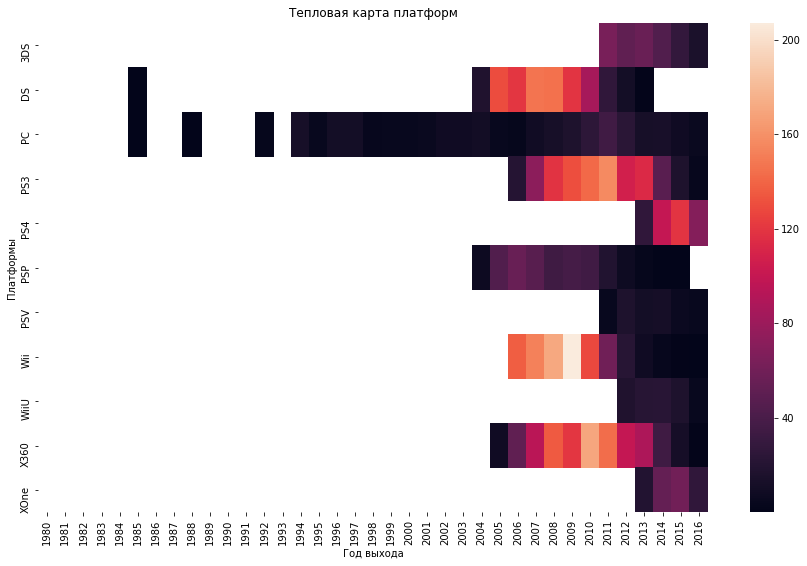

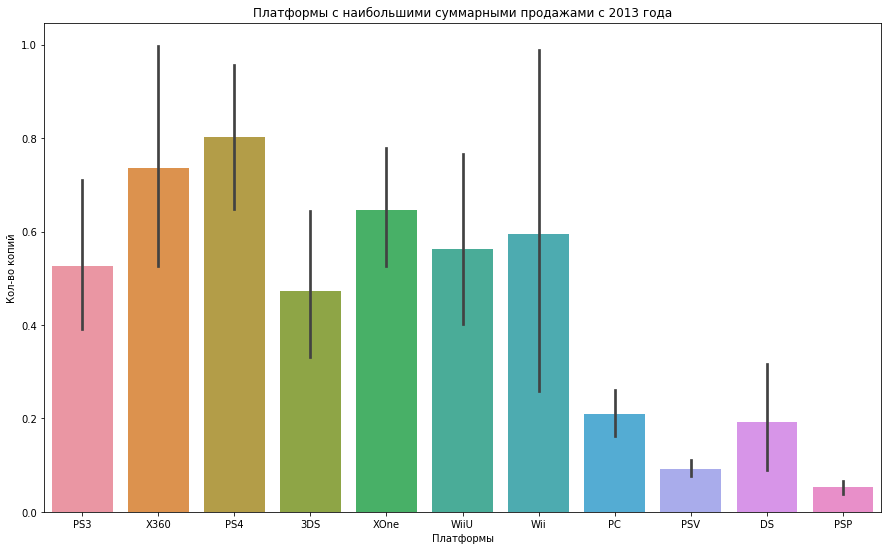

In [17]:
# Тепловая карта 
platform_list = ['X360', 'PS4', 'PS3', 'XOne', 'WiiU', 'Wii', '3DS', 'PC', 'PSV', 'DS', 'PSP']
dinamic_data = games_data.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))
dinamic_data = dinamic_data.query('platform in @platform_list')
plt.figure(figsize = (15, 9))
sns.heatmap(dinamic_data)
plt.title('Тепловая карта платформ')
plt.xlabel('Год выхода')
plt.ylabel('Платформы')

# График платформ 
plt.figure(figsize = (15, 9))
sns.barplot(data = good_data, x = 'platform', y = 'total_sales')
plt.title('Платформы с наибольшими суммарными продажами с 2013 года')
plt.xlabel('Платформы')
plt.ylabel('Кол-во копий')

Наиболее прибыльные платформы - X360, PS4, PS3, XOne, WiiU, Wii. На тепловой карте можно увидеть динамику продаж по годам. У PC продажи держатся на одном уровне долгие годы, исключением является 2011 год. С падением продаж у PS3, выпустили PS4. Платформа Wii с первого года имела высокие продажи, пик приходится на 2009 год. Но постепенно ее продажи стали падать и падают до сих пор. У остальных платформ дела обстоят не лучше. Рост наблюдался у Xone и у PS4 за 2015 год, однако потом продажи стали падать.

count    1285.000000
mean        0.666397
std         1.437467
min         0.010000
25%         0.060000
50%         0.200000
75%         0.640000
max        21.050000
Name: total_sales, dtype: float64


Text(0, 0.5, 'Кол-во копий')

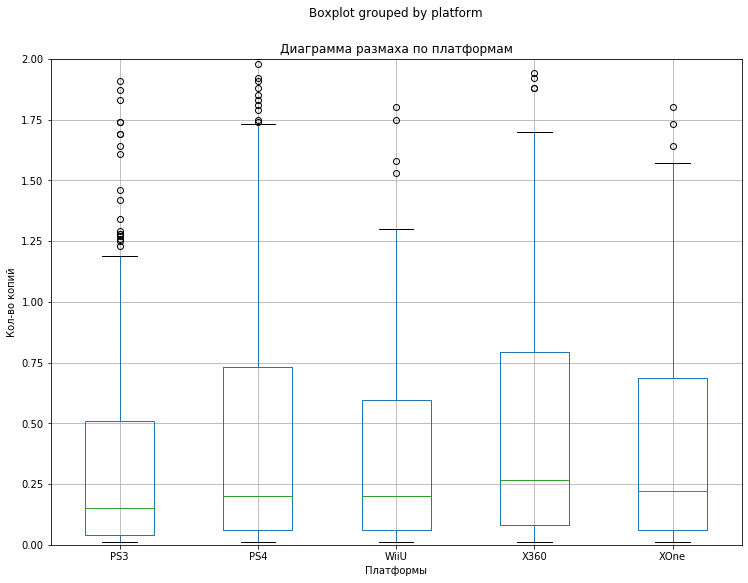

In [18]:
#Строю диаграмму размаха 
best_platform = ['X360', 'PS4', 'PS3', 'XOne', 'WiiU']
top_5_data = good_data.query('platform in @best_platform')
print(top_5_data['total_sales'].describe()) 
top_5_data.boxplot(column = 'total_sales', by = 'platform', figsize = (12,9))
plt.ylim(0, 2)
plt.title('Диаграмма размаха по платформам')
plt.xlabel('Платформы')
plt.ylabel('Кол-во копий')

Диаграмма размаха показывает, что в среднем показатели у всех платформ приблизительно одиннаковые, около 0,25 млн. копий. Отличием является WiiU, у этой платформы 3 квартиль меньше, чем у остальных.   

Коэффициент корреляции: 0.037685894502836624


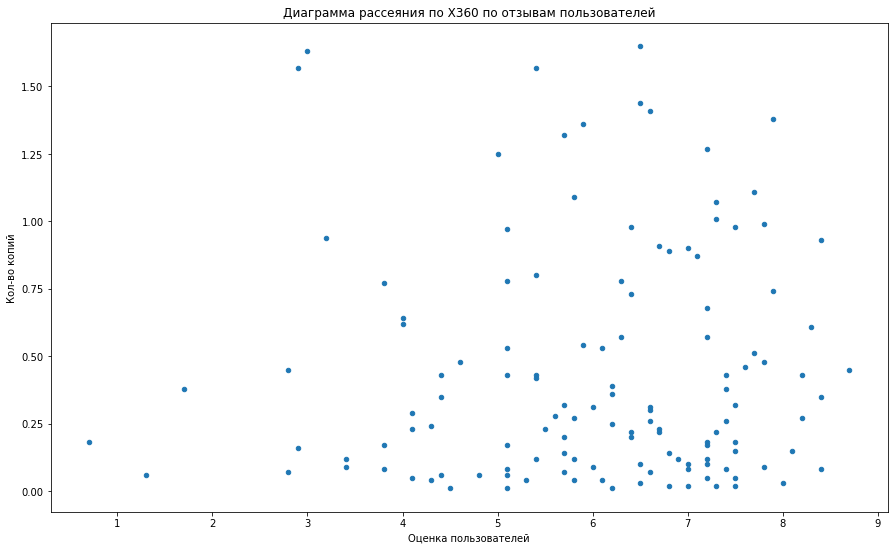

In [19]:
# Строю диаграмму рассеяния по х360, установил порог в 1,7 для total_sales, чтобы убрать выбросы
xbox360_data = top_5_data.query('platform == "X360" and total_sales <= 1.7')
xbox360_data.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (15,9))
plt.title('Диаграмма рассеяния по X360 по отзывам пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во копий')
print('Коэффициент корреляции:', xbox360_data['total_sales'].corr(xbox360_data['user_score']))

Коэффициент корреляции: 0.4719998814213742


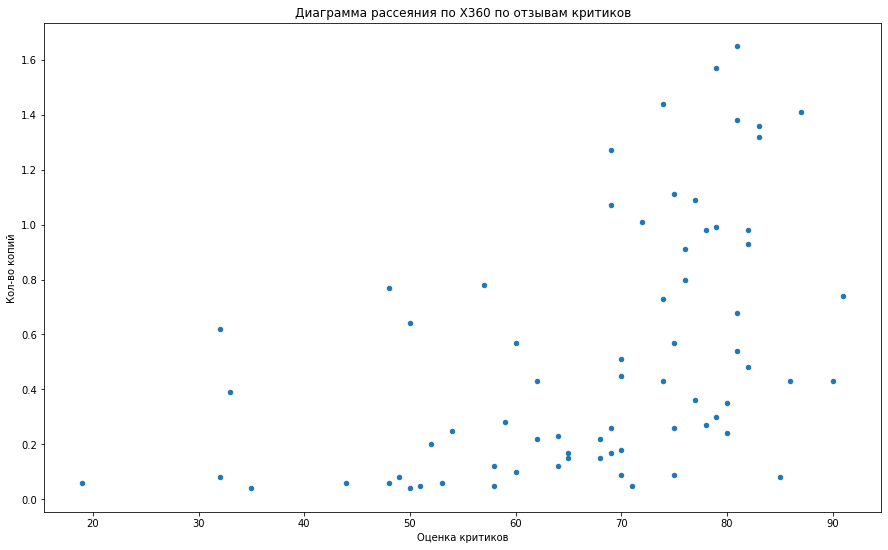

In [20]:
# Строю диаграмму рассеяния по х360
xbox360_data.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (15,9))
plt.title('Диаграмма рассеяния по X360 по отзывам критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Кол-во копий')
print('Коэффициент корреляции:', xbox360_data['total_sales'].corr(xbox360_data['critic_score']))

По графикам видно, что есть зависимость между оценкой критиков и пользователей. Чем больше балл, тем выше продажи. Корреляция положительная. Чем лучше отзыв критика, тем выше продажи, показатель 0,5. Отзывы пользователей не так сильно влияют на продажи, там коэффициент корреляции Пирсона равен 0,2. 

Коэффициент корреляции: -0.011742185147181342
Коэффициент корреляции: 0.3503445460228664
Коэффициент корреляции: -0.031957110204556376
Коэффициент корреляции: 0.406567902061781
Коэффициент корреляции: 0.0023944027357566925
Коэффициент корреляции: 0.3342853393371919
Коэффициент корреляции: -0.06892505328279412
Коэффициент корреляции: 0.41699832800840175
Коэффициент корреляции: 0.4193304819266187
Коэффициент корреляции: 0.3764149065423912


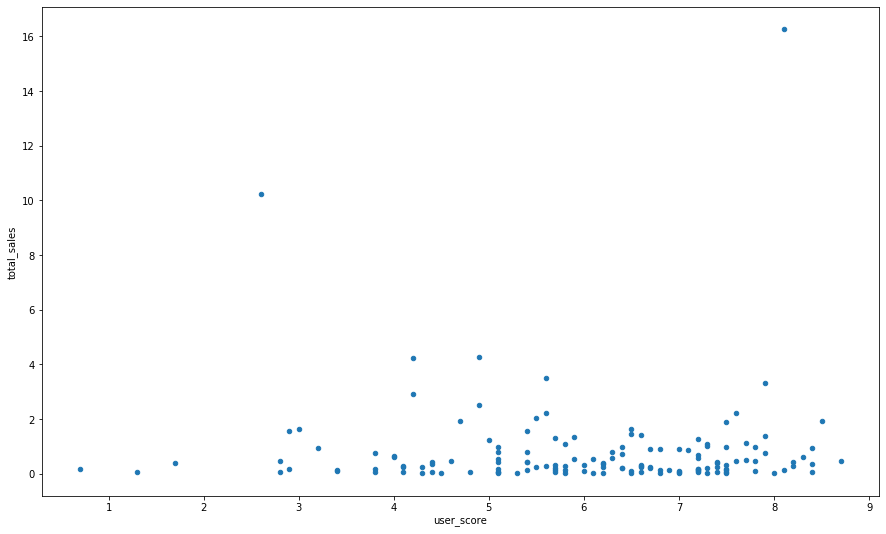

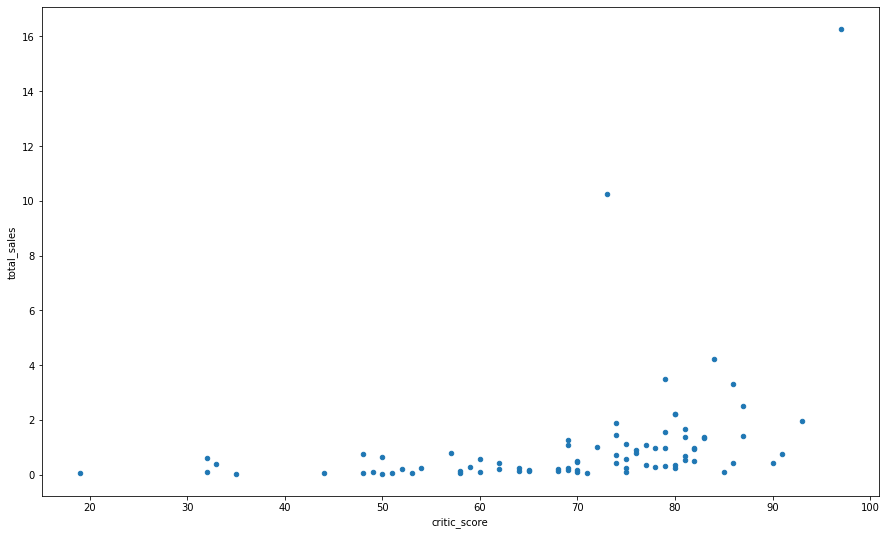

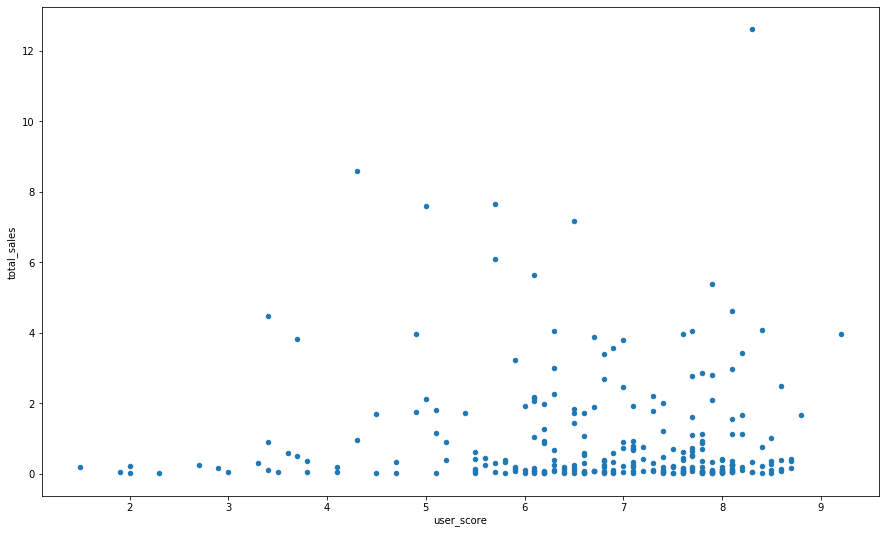

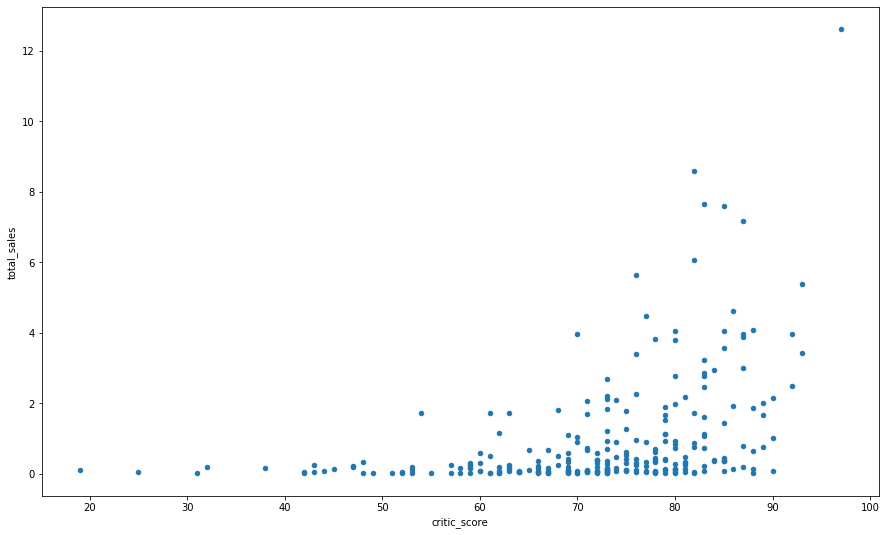

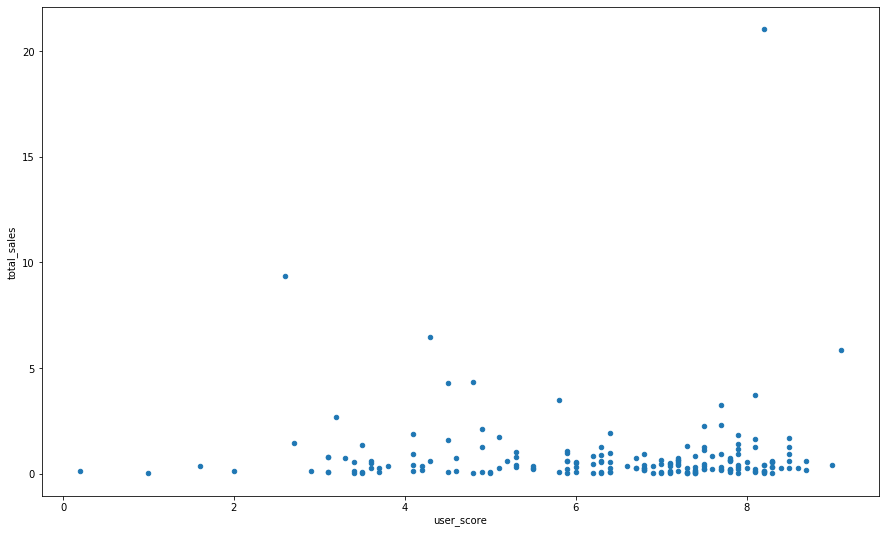

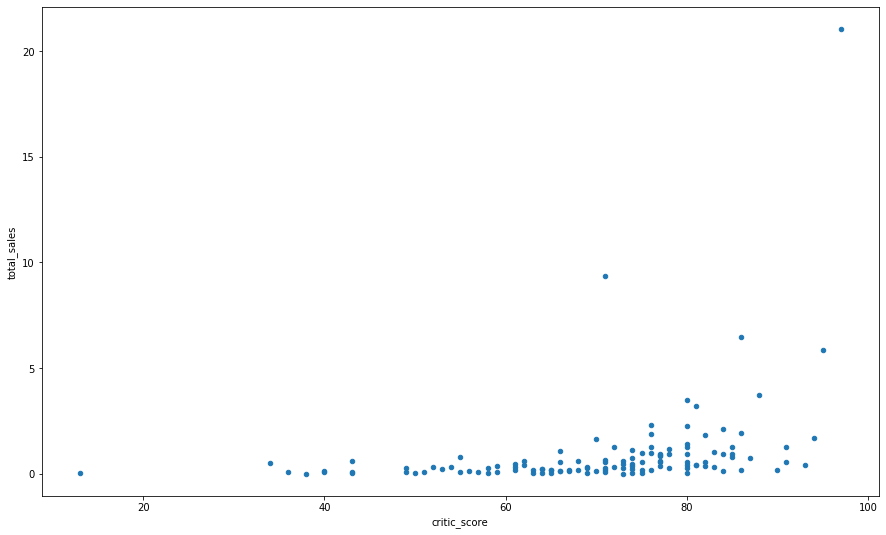

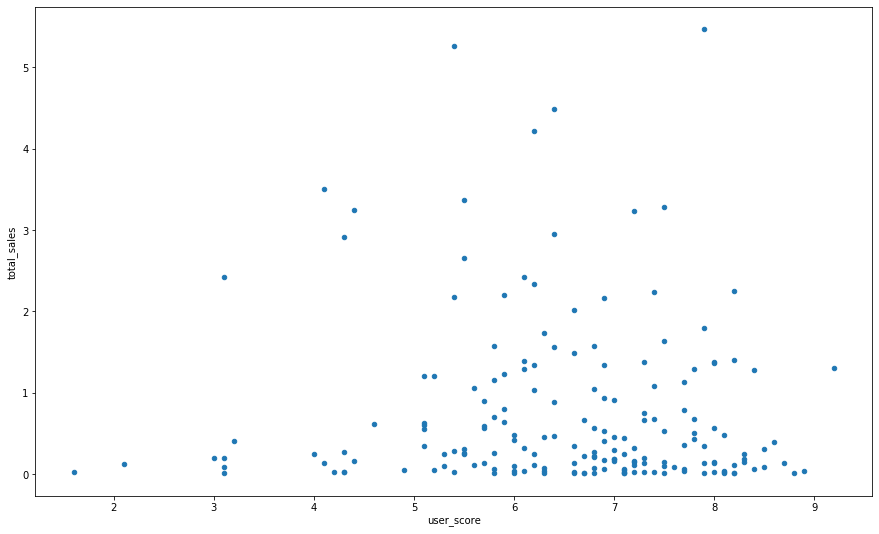

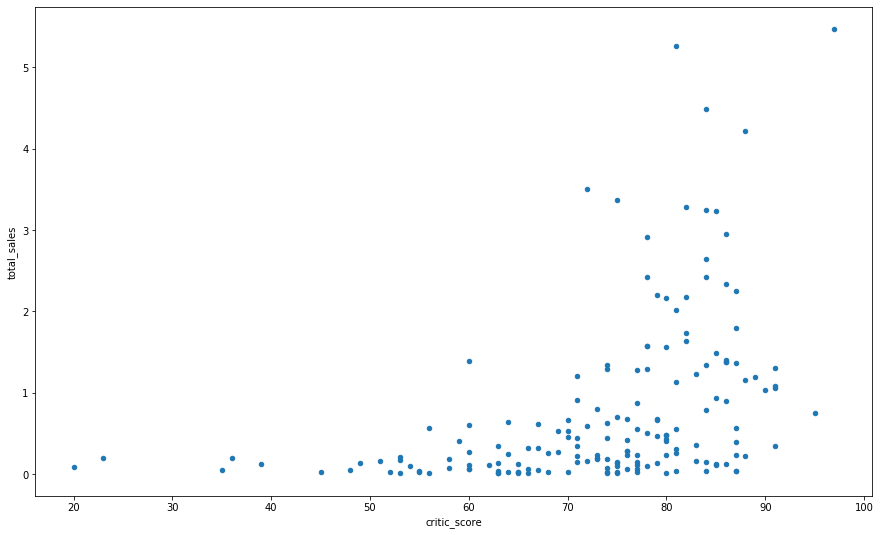

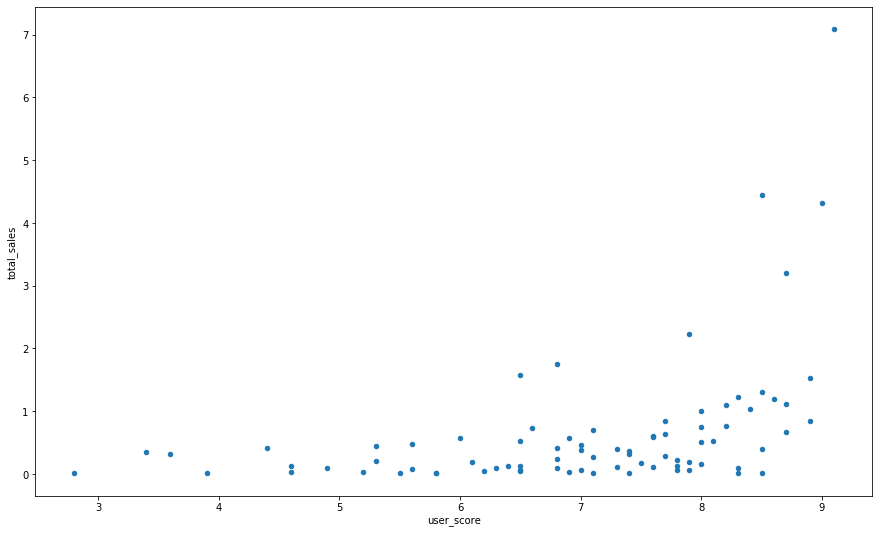

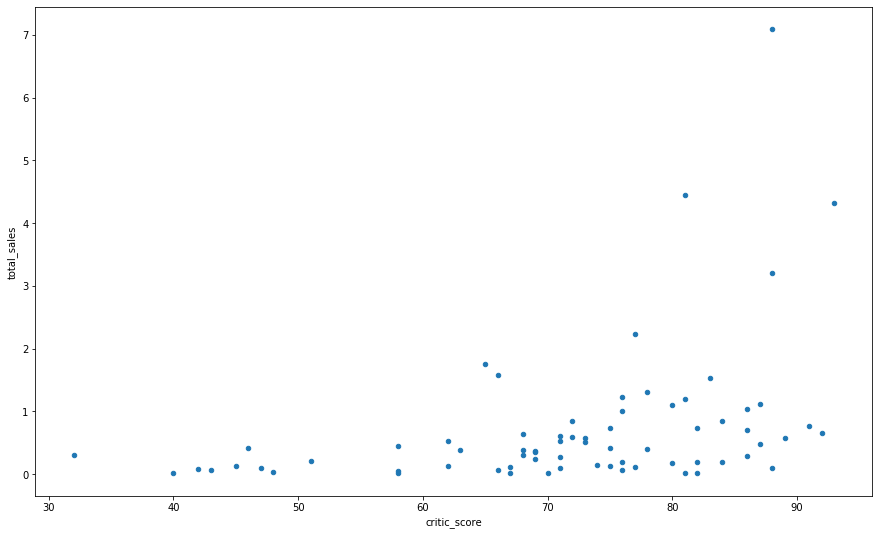

In [21]:
# Цикл для определения корреляции
for i in best_platform:
    data = top_5_data.query('platform == @i')
    data.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (15,9))
    print('Коэффициент корреляции:', data['total_sales'].corr(data['user_score']))
    data.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (15,9))
    print('Коэффициент корреляции:', data['total_sales'].corr(data['critic_score']))

Для других платформ можно сделать примерно такой же вывод. Оценки критиков больше влияют на продажи, нежели оценки пользователей. Графики показывают наличие зависимости, однако коэффициент корреляции Пирсона для некоторых платформ по оценке пользователей показывает отрицательное значение близкое к нулю (PS4, XOne).

Text(0, 0.5, 'Кол-во копий')

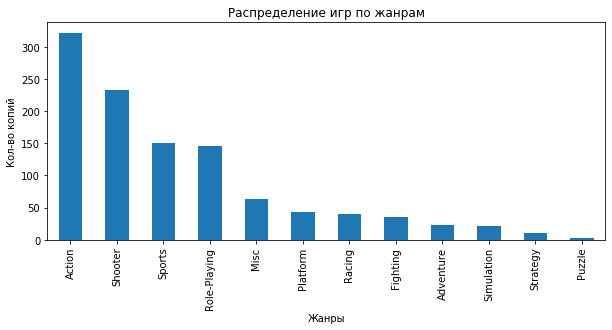

In [22]:
# График по жанрам
good_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar")
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Кол-во копий')

Самым прибальным жанром является action, далее идет shooter, у следующего по прибыли жанра sports, выручка меньше почти в два раза по сравнению с первым местом. Хуже всего дела обстоят у жанров puzzle и strategy.

**Вывод**

1. В целом до 94 года игр выходило немного, но начиная с этого года, наблюдается подъем в игровой индустрии. Игр выходит все больше и больше, вплоть до 2012 года. В 2012 показатели сильно упали, почти до уровня 2001 года.
2. Новые платформы появляются ориентировочно через каждые 5, а старые исчезают приблизительно через 10 лет. Определил актуальный период в 9 лет.
3. Наиболее прибыльные платформы - X360, PS4, PS3, XOne, WiiU. Диаграмма размаха показывает, что в среднем показатели у всех платформ приблизительно одиннаковые, около 0,25 млн. копий.
4. На графиках можно увидеть, что есть зависимость между оценкой критиков и пользователей. Корреляция почти везде положительная. Отзывы критиков больше влияют на продажи, чем отзывы пользователей. 
5. По результатам исследования самым прибальным жанром является action. Жанры puzzle и strategy пользуются спросом меньше всего.

## 4. Составление портрета пользователя каждого региона <a class="anchor" id="sp"></a>

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


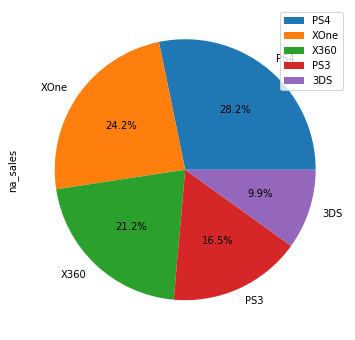

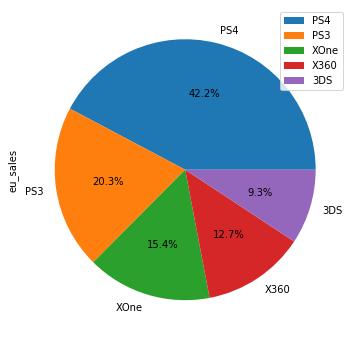

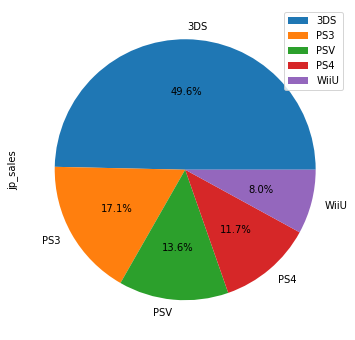

In [23]:
# Цикл для определения самых популярных платформ и построения круговых диаграмм для СА, Европы и Японии 
region_list = ['na_sales', 'eu_sales', 'jp_sales']
for i in region_list:
    data = good_data.pivot_table(index = 'platform', values = i, aggfunc = 'sum').sort_values(by = i, ascending = False).head(5)
    display(data)
    data.plot(kind = 'pie', y = i, autopct='%1.1f%%', figsize=(6,6))

Самая популярная платформа в Северной Америке Xbox360, на втором и третьем месте идут PS3 и Wii. В Европе на первом месте PS3, следом идут Xbox360 и Wii. В Японии возглавляет список 3DS, далее DS и PS3. Стоит отметить платформы PS3 и Wii, они есть во всех регионах.    	

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


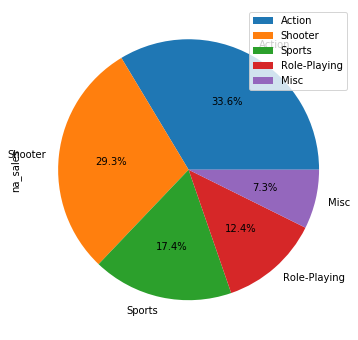

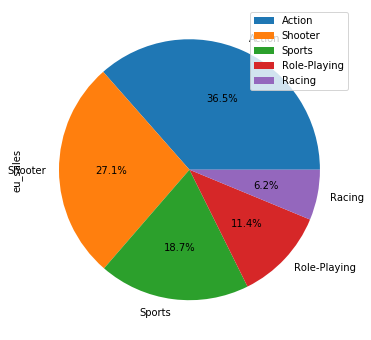

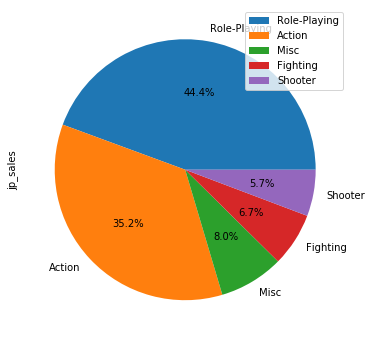

In [24]:
# Цикл для определения самых популярных жанров и построения круговых диаграмм для СА, Европы и Японии 
for i in region_list:
    data = good_data.pivot_table(index = 'genre', values = i, aggfunc = 'sum').sort_values(by = i, ascending = False).head(5)
    display(data)
    data.plot(kind = 'pie', y = i, autopct='%1.1f%%', figsize=(6,6))

Самые популярные жанры в Северной Америке и Европе Action, Shooter и Sports. На востоке же самым популярным жанром является Role-Playing. Далее идут Action и Misc. Стоит отметить, что шутер не входит в топ-5 жанров в Японии.  

,na_sales
rating,
M,165.21
AO,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
AO,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
AO,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


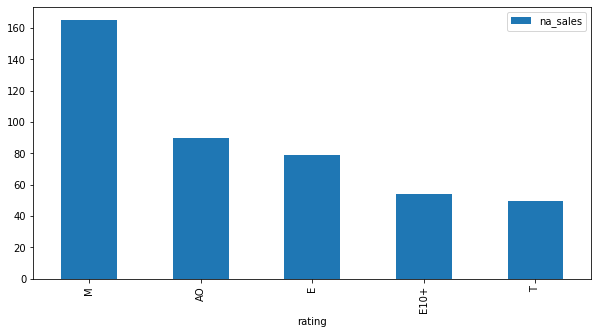

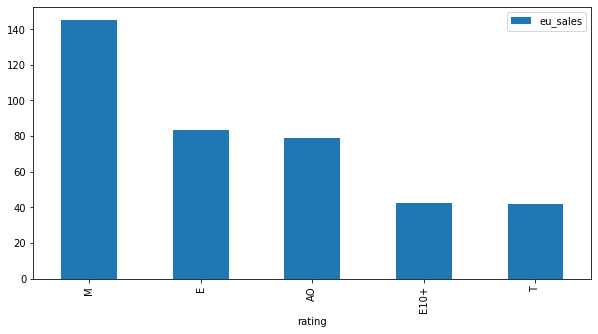

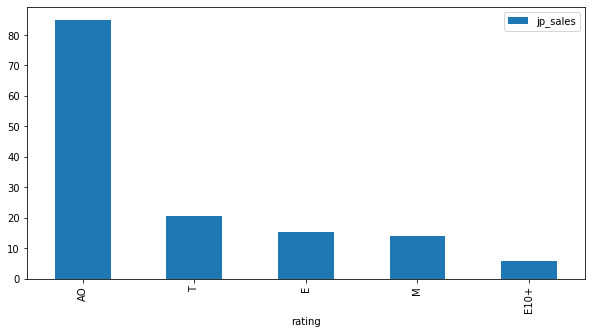

In [25]:
# Цикл для определения влияния рейтинга ESRB на продажи для СА, Европы и Японии 
for i in region_list:
    data = good_data.pivot_table(index = 'rating', values = i, aggfunc = 'sum').sort_values(by = i, ascending = False)
    display(data)
    data.plot(kind = 'bar', y = i, figsize=(10,5))

В Северной Америке преобладает рейтинг Е — «Для всех», следом М — «Для взрослых» и Т — «Подросткам». Для Европы М — «Для взрослых», далее Е — «Для всех» и АО — «Только для взрослых». В Японии первое место занимает АО — «Только для взрослых», на втором и третьем местах Е — «Для всех» и Т — «Подросткам». Основываясь на данных из столбчатых графиков можно сделать вывод, что ЕС — «Для детей младшего возраста» не пользуется популярностью не в одном из регионов.

**Вывод**

1. Самые популярные платформы в Америке и Европе одиннаковые - это PS3, Xbox360 и Wii, просто в Северной Америке больше предпочитают Xbox360, а в Европе PS3. В Японии больше пользуется спросом продукция японской компании Nintendo, портативные игровые системы 3DS и DS, также там популярна PS3 компании Sony. 
2. В СА и Европе одни и те же популярные игровые жанры - Action, Shooter и Sports. В Японии самый популярный жанр Role-Playing, Action и Misc, а Shooter нет вовсе.    
3. Самые популярные возрастные ограничения в С. Америке, Европе, Японии - E, T, M, АО. E10+ в Америке обгоняет АО, но в Европе и Японии «Adults Only 18+» преобладает. 


Из полученных данных можно сделать вывод, что хорошие продажи можно получить у платформ '3DS','PS3','X360','Wii'. Также стоит обратить внимание на появление новых версий данных платформ. Выбирая жанры, самыми популярными являются Action, Sport, Shooter и Role-Playing с ориентацией от 13 лет и старше. 

## 5. Проверка гипотез <a class="anchor" id="pg"></a>

In [26]:
# Вывел среднее количество, дисперсию и стандартное отклонение по оценкам пользователей для XOne и PC
xone_pc_data = good_data.query('platform in ("XOne", "PC")')
xone_pc_data = xone_pc_data.dropna()
xone_pc_data.groupby('platform').agg({'user_score': ['mean', 'var', 'std']})

user_score                    
               mean       var       std
platform                               
PC         6.302027  2.932445  1.712438
XOne       6.538182  1.796399  1.340298

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
2,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
3,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
4,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


AxesSubplot(0.125,0.125;0.775x0.755)
count    165.000000
mean       6.538182
std        1.340298
min        2.100000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
name               165 non-null object
platform           165 non-null object
year_of_release    165 non-null int64
genre              165 non-null object
na_sales           165 non-null float64
eu_sales           165 non-null float64
jp_sales           165 non-null float64
other_sales        165 non-null float64
critic_score       165 non-null float64
user_score         165 non-null float64
rating             165 non-null object
total_sales        165 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 15.6+ KB


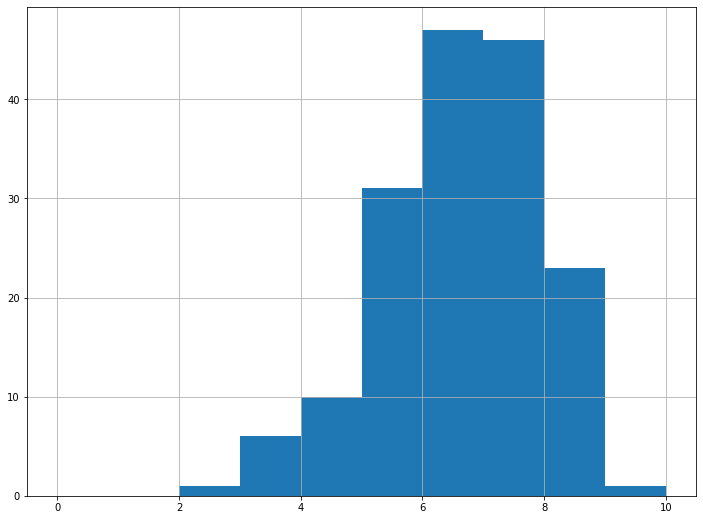

In [27]:
# Построил гистограмму и вывел общую информацию по XOne
xone_data = good_data.query('platform == "XOne"')
xone_data = xone_data.dropna().reset_index(drop = True)
display(xone_data.head())
print(xone_data['user_score'].hist(bins=10, range=(0, 10), figsize=(12,9)))
print(xone_data['user_score'].describe())
xone_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
2,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
3,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
4,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28


AxesSubplot(0.125,0.125;0.775x0.755)
count    148.000000
mean       6.302027
std        1.712438
min        1.400000
25%        5.375000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
name               148 non-null object
platform           148 non-null object
year_of_release    148 non-null int64
genre              148 non-null object
na_sales           148 non-null float64
eu_sales           148 non-null float64
jp_sales           148 non-null float64
other_sales        148 non-null float64
critic_score       148 non-null float64
user_score         148 non-null float64
rating             148 non-null object
total_sales        148 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 14.0+ KB


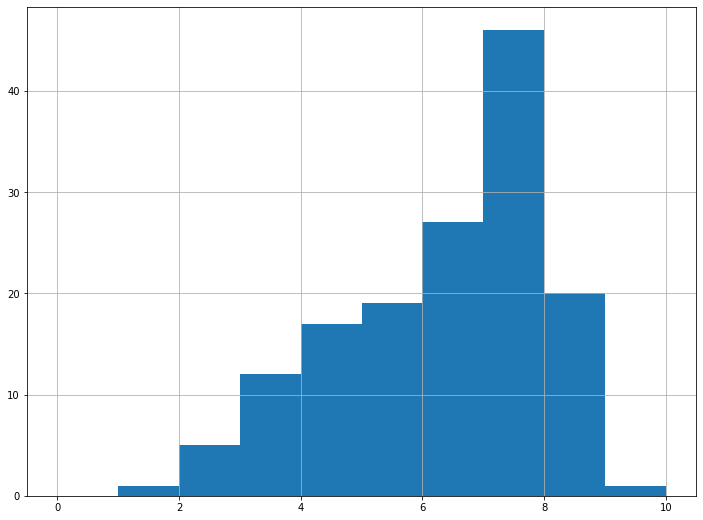

In [28]:
# Построил гистограмму и вывел общую информацию по PC
pc_data = good_data.query('platform == "PC"')
pc_data = pc_data.dropna().reset_index(drop = True)
display(pc_data.head())
print(pc_data['user_score'].hist(bins=10, range=(0, 10), figsize=(12,9)))
print(pc_data['user_score'].describe())
pc_data.info()

In [29]:
# Проверка гипотезы
xone_score = xone_pc_data[xone_pc_data['platform'] == 'XOne']['user_score']
pc_score = xone_pc_data[xone_pc_data['platform'] == 'PC']['user_score']

alpha = 0.05
results = st.ttest_ind(xone_score, pc_score, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC приблизительно одинаковы. Параметры равны.

In [30]:
# Вывел среднее количество, дисперсию и стандартное отклонение по оценкам пользователей для Action и Sports
genre_data = good_data.query('genre in ("Action", "Sports")')
genre_data = genre_data.dropna()
genre_data.groupby('genre').agg({'user_score': ['mean', 'var', 'std']})

user_score                    
             mean       var       std
genre                                
Action   6.936246  1.646214  1.283049
Sports   5.665455  2.131640  1.460014

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
4,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


AxesSubplot(0.125,0.125;0.775x0.755)
count    309.000000
mean       6.936246
std        1.283049
min        2.000000
25%        6.400000
50%        7.300000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
name               309 non-null object
platform           309 non-null object
year_of_release    309 non-null int64
genre              309 non-null object
na_sales           309 non-null float64
eu_sales           309 non-null float64
jp_sales           309 non-null float64
other_sales        309 non-null float64
critic_score       309 non-null float64
user_score         309 non-null float64
rating             309 non-null object
total_sales        309 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 29.1+ KB


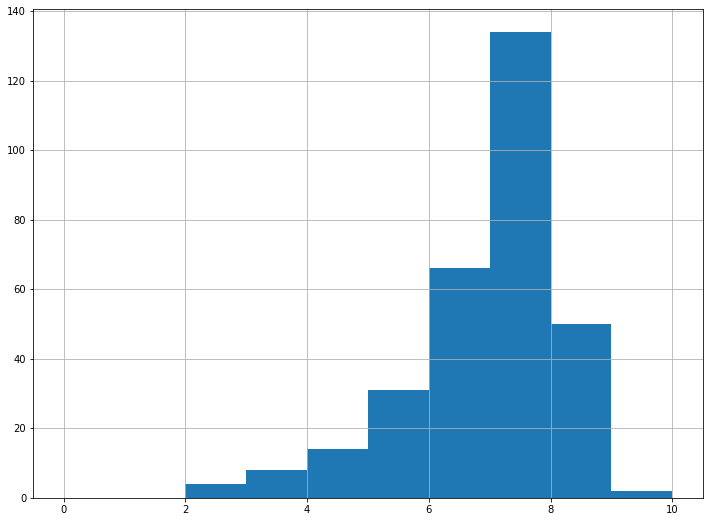

In [31]:
# Построил гистограмму и вывел общую информацию по Action
action_data = good_data.query('genre == "Action"')
action_data = action_data.dropna().reset_index(drop = True)
display(action_data.head())
print(action_data['user_score'].hist(bins=10, range=(0, 10), figsize=(12,9)))
print(action_data['user_score'].describe())
action_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
1,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
2,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
3,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
4,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22


AxesSubplot(0.125,0.125;0.775x0.755)
count    110.000000
mean       5.665455
std        1.460014
min        1.500000
25%        4.650000
50%        5.850000
75%        6.675000
max        8.700000
Name: user_score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
name               110 non-null object
platform           110 non-null object
year_of_release    110 non-null int64
genre              110 non-null object
na_sales           110 non-null float64
eu_sales           110 non-null float64
jp_sales           110 non-null float64
other_sales        110 non-null float64
critic_score       110 non-null float64
user_score         110 non-null float64
rating             110 non-null object
total_sales        110 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 10.4+ KB


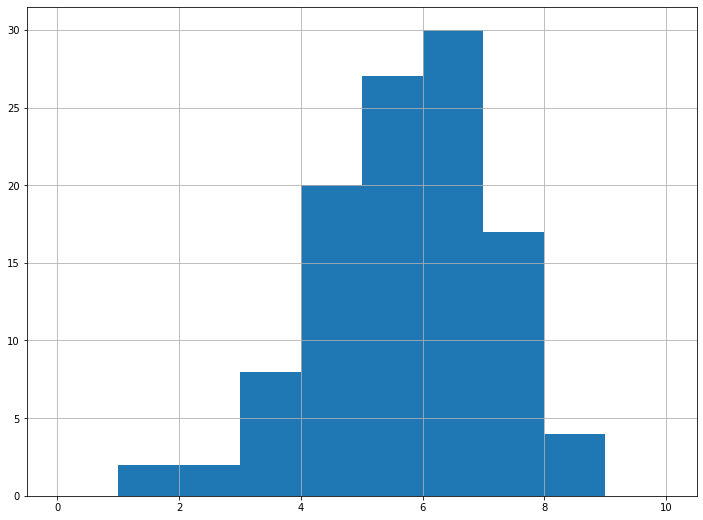

In [32]:
# Построил гистограмму и вывел общую информацию по Sports
sports_data = good_data.query('genre == "Sports"')
sports_data = sports_data.dropna().reset_index(drop = True)
display(sports_data.head())
print(sports_data['user_score'].hist(bins=10, range=(0, 10), figsize=(12,9)))
print(sports_data['user_score'].describe())
sports_data.info()

In [33]:
# Проверка гипотезы
action_score = genre_data[genre_data['genre'] == 'Action']['user_score']
sports_score = genre_data[genre_data['genre'] == 'Sports']['user_score']

alpha = 0.05
results = st.ttest_ind(action_score, sports_score, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0496920005008588e-13
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Формируем двустороннюю гипотезу:

Нулевая гипотеза – средние пользовательские рейтинги платформ Xbox One и PC не различаются, параметры равны. 
Альтернативная гипотеза – средние пользовательские рейтинги платформ Xbox One и PC различаются, параметры не равны.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Формируем двустороннюю гипотезу:

Нулевая гипотеза – средние пользовательские рейтинги жанров Action и Sports не различаются, параметры равны. 
Альтернативная гипотеза – средние пользовательские рейтинги жанров Action и Sports различаются, параметры не равны.

H₀ всегда формулируется так, чтобы использовать знак равенства.

## 6. Общий вывод <a class="anchor" id="ov"></a>

По данным интернет-магазина «Стримчик», можно сделать несколько выводов:

1. С 2012 года количество выпускаемых игр сильно снизилось, с каждым последующим годом игр выходит все меньше. 
2. Новые платформы появляются ориентировочно через каждые 5, а старые исчезают приблизительно через 10 лет.
3. Отзывы критиков больше влияют на продажи, чем отзывы пользователей.
4. Наиболее прибыльные платформы по всему миру - X360, PS4, PS3, XOne, WiiU.
5. Для Северной Америки, Европы и Японии хорошие продажи можно получить у платформ '3DS','PS3','X360','Wii'. Также стоит обратить внимание на появление новых версий данных платформ. Выбирая жанры, самыми популярными являются Action, Sports, Shooter и Role-Playing с ориентацией от 13 лет и старше.